In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/sample_data/mission 2.csv")

In [3]:
data.head(10)

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,Suburban,1295,5,1,2007,5,61023
1,Urban,1163,1,3,1961,1,216619
2,Urban,2020,1,2,1983,5,168012
3,Suburban,1279,2,1,2004,1,206542
4,Urban,2268,1,1,1961,2,316979
5,Urban,3072,2,2,1988,5,418501
6,Rural,1979,2,3,1982,5,433934
7,Rural,2353,3,3,1975,3,172402
8,Urban,1636,4,2,1957,4,215421
9,Urban,1520,2,2,1965,2,325987


In [4]:
data.isna().sum()

,0
Location,0
Size (sqft),0
Bedrooms,0
Bathrooms,0
Year Built,0
Condition,0
Price,0


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Location'] =  le.fit_transform(data['Location'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Location     1000 non-null   int64
 1   Size (sqft)  1000 non-null   int64
 2   Bedrooms     1000 non-null   int64
 3   Bathrooms    1000 non-null   int64
 4   Year Built   1000 non-null   int64
 5   Condition    1000 non-null   int64
 6   Price        1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[['Size (sqft)',  'Bedrooms', 'Bathrooms', 'Year Built', 'Condition']] = sc.fit_transform(
    data[['Size (sqft)',  'Bedrooms', 'Bathrooms', 'Year Built', 'Condition']])

In [7]:
data.columns

Index(['Location', 'Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built',
       'Condition', 'Price'],
      dtype='object')

In [11]:
data.head()

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,1,-1.067816,1.729282,-1.231835,1.040608,1.255999,61023
1,2,-1.240099,-1.235625,1.256721,-1.133331,-1.397988,216619
2,2,-0.121569,-1.235625,0.012443,-0.093621,1.255999,168012
3,1,-1.088699,-0.494398,-1.231835,0.898830,-1.397988,206542
4,2,0.202113,-1.235625,-1.231835,-1.133331,-0.734491,316979


In [12]:
data.describe()

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,1.020000,2.913225e-16,9.769963e-17,4.618528e-17,2.664535e-16,-6.394885e-17,282989.120000
std,0.815024,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,130220.566705
min,0.000000,-1.981435e+00,-1.235625e+00,-1.231835e+00,-1.653187e+00,-1.397988e+00,54748.000000
25%,0.000000,-7.506603e-01,-1.235625e+00,-1.231835e+00,-9.442932e-01,-7.344908e-01,172402.000000
50%,1.000000,-5.631023e-02,2.468285e-01,1.244278e-02,-9.362118e-02,-7.099414e-02,309747.000000
75%,2.000000,8.142377e-01,9.880552e-01,1.256721e+00,8.988295e-01,1.255999e+00,391003.000000
max,2.000000,1.780063e+00,1.729282e+00,1.256721e+00,1.607723e+00,1.255999e+00,498345.000000


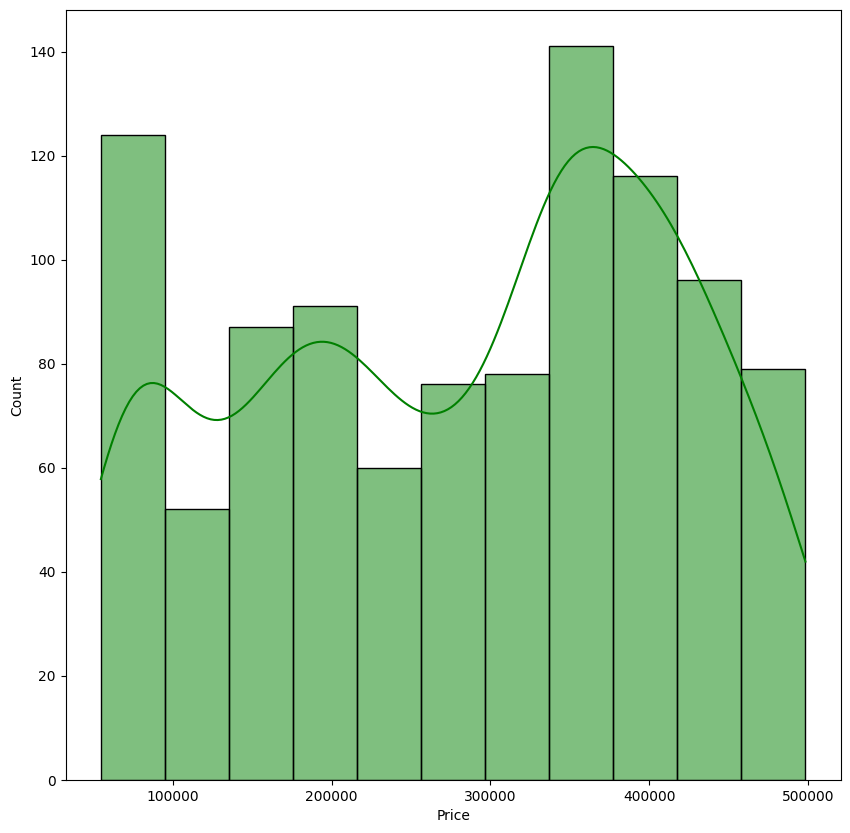

In [14]:
plt.figure(figsize=(10,10))
sns.histplot(data['Price'], color="green", kde=True)
plt.title = 'Price Distribution'
plt.xlable = "Price"
plt.ylable= "Frequency"
plt.show()

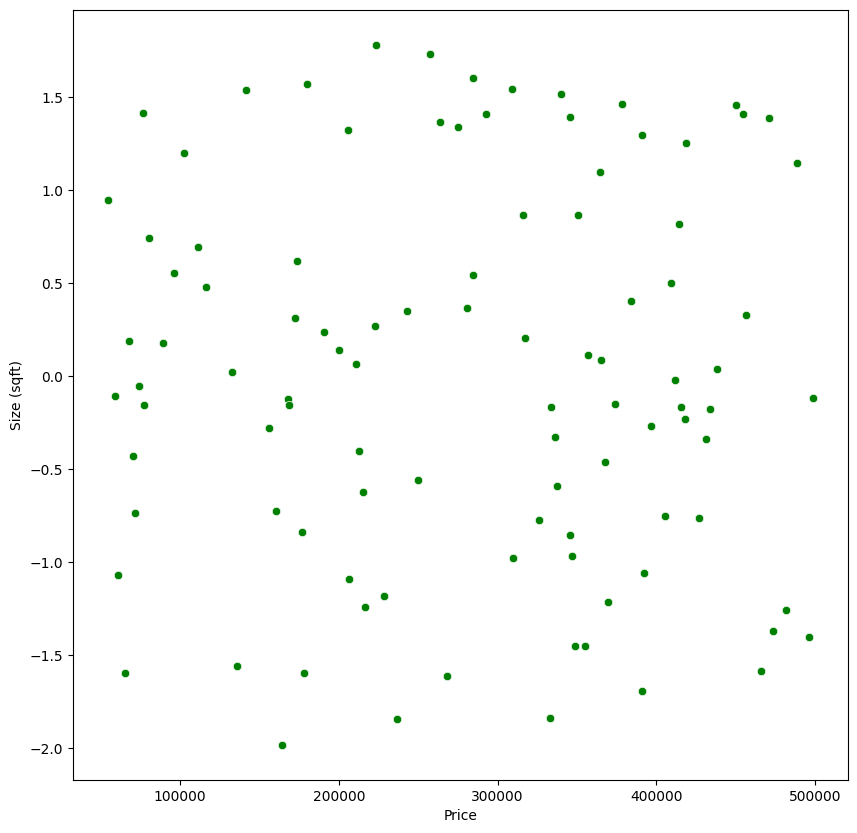

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Price'], y= data['Size (sqft)'], color="green")
plt.title = 'Price & Size Relation'
plt.xlable = "Price"
plt.ylable= "Size"
plt.show()

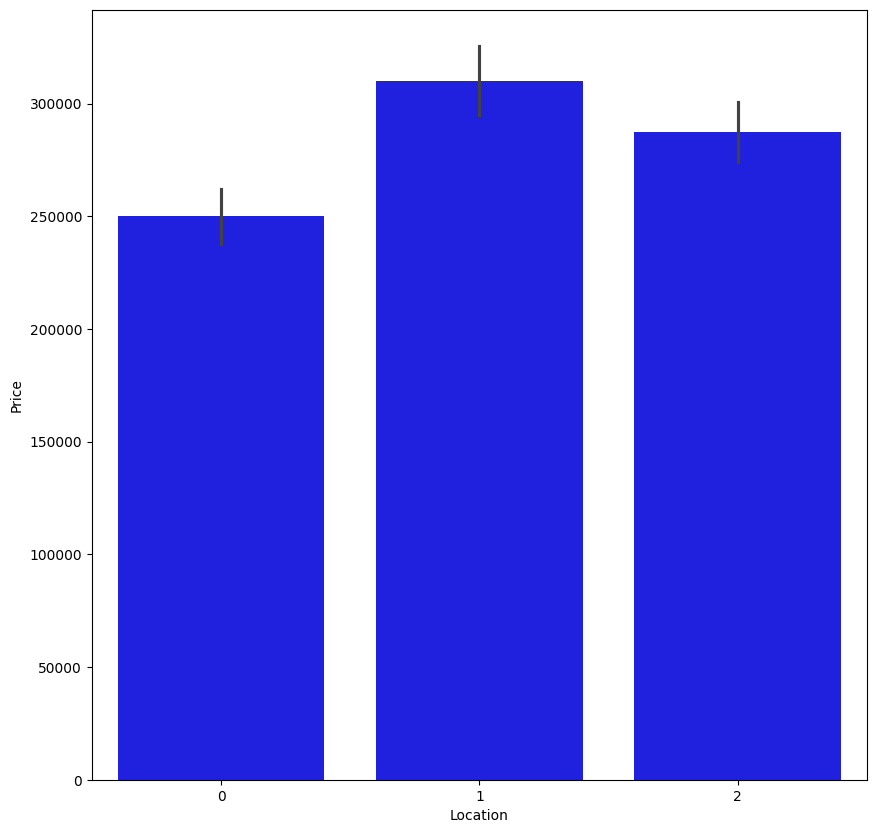

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Location'],y=data['Price'], color="blue")
plt.title = 'impact of location on price'
plt.xlable = "location"
plt.ylable= "Price"
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x = data.drop('Price', axis=1)
y =data['Price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error



In [22]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [23]:
y_predict_lr = lr.predict(x_test)
y_predict_dt = dt.predict(x_test)
y_predict_rf = rf.predict(x_test)


In [24]:
print("Linear Regression MSE:", mean_squared_error(y_test, y_predict_lr))
print("DecisionTreeRegressor MSE:", mean_squared_error(y_test, y_predict_dt))
print("Random Forest MSE:", mean_squared_error(y_test, y_predict_rf))


Linear Regression MSE: 15770483148.400627
DecisionTreeRegressor MSE: 0.0
Random Forest MSE: 2571279.1743035004


In [25]:
print("Linear Regression MSE:", mean_absolute_error(y_test, y_predict_lr))
print("DecisionTreeRegressor MSE:", mean_absolute_error(y_test, y_predict_dt))
print("Random Forest MSE:", mean_absolute_error(y_test, y_predict_rf))


Linear Regression MSE: 109912.47385351837
DecisionTreeRegressor MSE: 0.0
Random Forest MSE: 467.1923499999997


In [39]:
print("r2_score Linear Regression:", r2_score(y_test, y_predict_lr))
print("r2_score DecisionTreeRegressor:", r2_score(y_test, y_predict_dt))
print("r2_score Random Forest:", r2_score(y_test, y_predict_rf))

r2_score Linear Regression: 0.06591055803266965
r2_score DecisionTreeRegressor: 1.0
r2_score Random Forest: 0.9998477025271536


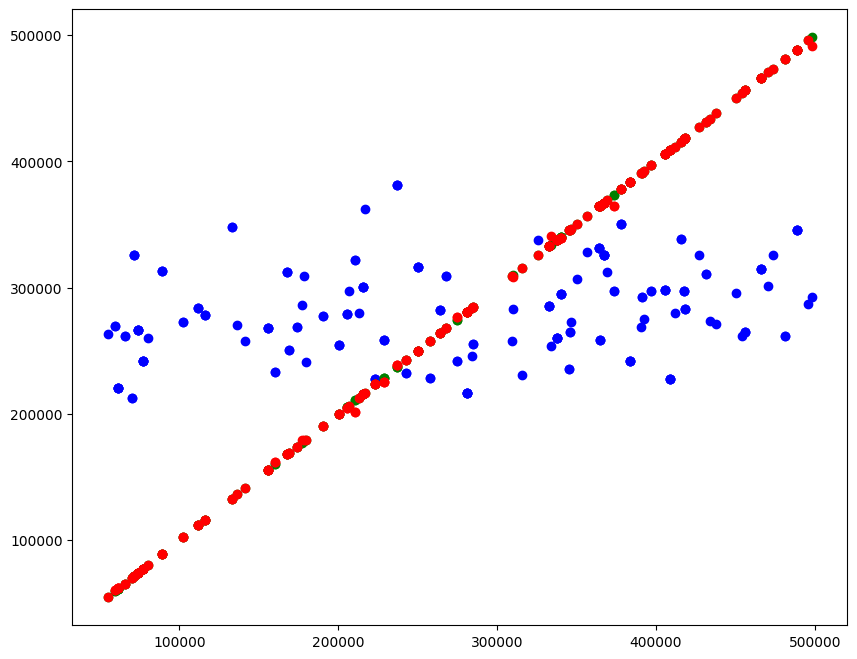

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_predict_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_predict_dt, color='green', label='Decision Tree')
plt.scatter(y_test, y_predict_rf, color='red', label='Random Forest')
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# using Gridsearch
gird_params = {
    "max_depth": [5,15,10,20,30], "max_leaf_nodes": [10,20,30,50,15,5,7]
}
grid_search_model = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=gird_params, cv=5)
grid_search_model.fit(x_train, y_train)
grid_search_model.best_params_

{'max_depth': 15, 'max_leaf_nodes': 50}

In [41]:
grid_y_predict = grid_search_model.best_estimator_.predict(x_test)
print("r2_score GridSearch:", r2_score(y_test, grid_y_predict))
print("MSE GridSearch:", mean_squared_error(y_test, grid_y_predict))
print("MAE GridSearch:", mean_absolute_error(y_test, grid_y_predict))


r2_score GridSearch: 0.9646924910607075
MSE GridSearch: 596106164.7012935
MAE GridSearch: 17223.220838076657


In [42]:
random_params = {
    'max_depth': [5,15,10,20,30], "n_estimators": [100,200,300,400,500]
}

ranom_model = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_params, cv=5)
ranom_model.fit(x_train, y_train)
ranom_model.best_params_

{'n_estimators': 500, 'max_depth': 30}

In [43]:
random_y_predict = ranom_model.best_estimator_.predict(x_test)
print("r2_score Random Search:", r2_score(y_test,random_y_predict))
print("MSE Random Search:", mean_squared_error(y_test, random_y_predict))
print("MAE Random Search:", mean_absolute_error(y_test, random_y_predict))

r2_score Random Search: 0.9999153921484492
MSE Random Search: 1428457.101811923
MAE Random Search: 404.34186000000017


In [44]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [45]:
import gradio as gr
def predict_house_price(Location, Size, Bedrooms, Bathrooms, YearBuilt, Condition):
  # Create a DataFrame with the input data
    input_data = pd.DataFrame({
        'Location': [Location],
        'Size (sqft)': [Size],
        'Bedrooms': [Bedrooms],
        'Bathrooms': [Bathrooms],
        'Year Built': [YearBuilt],
        'Condition': [Condition]
    })

    # Encode the categorical column
    input_data['Location'] = le.transform(input_data['Location'])

    # Scale the numerical columns (assume scaling_cols contains the numeric column names)
    scaling_cols = ['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built', 'Condition']
    input_data[scaling_cols] = sc.transform(input_data[scaling_cols])

    # Predict the house price
    prediction = rf.predict(input_data)
    return f"Predicted House Price: ${prediction[0]:,.2f}"
gr.Interface(
    fn=predict_house_price,
    inputs=[
        gr.Dropdown(
            ["Suburban", "Urban", "Rural"], label="Location"),

        gr.Number(label="Size (sqft)"),
        gr.Number(label="Bedrooms"),
        gr.Number(label="Bathrooms"),
        gr.Number(label="Year Built"),
        gr.Number(label="Condition (1-5)")
    ],
    outputs="text",
    title="House Price Prediction"
).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ef8340e7e0a00a7643.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
